## 02-MNIST For ML Beginners
https://www.tensorflow.org/get_started/mnist/beginners

mnist softmax,堪称人工智能程序的 helloworld
还是那几步：

    import data

    define model
        这里用的还是 Wx+b结构，但是不同于前面的线性结构，这里如同下图
        
    define loss and train
    
        loss 用的是交叉熵，自带的函数比手写的稳定。
        train 依然是不变的 梯度下降   
    run training
        这里是循环一千次，每次用100个训练数据，显然数据是会循环利用多次。
        
    run test
        测试用的是所有测试数据，并且计算出了预测准确度，注意准确度的算法实现。


Extracting /home/w/tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


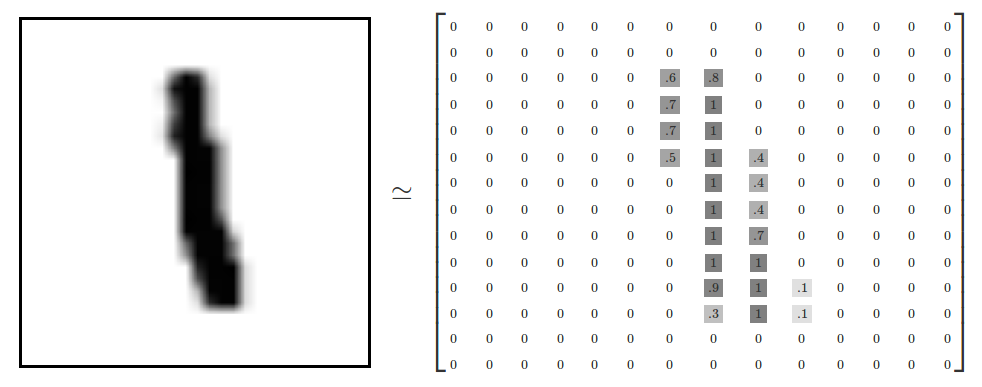

In [1]:
# import data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/home/w/tmp/tensorflow/mnist/input_data", one_hot=True)
from IPython.display import Image
Image('image/02-MNIST-Matrix.png') 

In [2]:
# create the model
x = tf.placeholder(tf.float32,[None,28*28])
y = tf.placeholder(tf.float32,[None,10])
W = tf.Variable(tf.zeros([28*28,10]))
b = tf.Variable(tf.zeros([10]))
logits = tf.matmul(x,W)+b

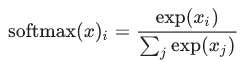

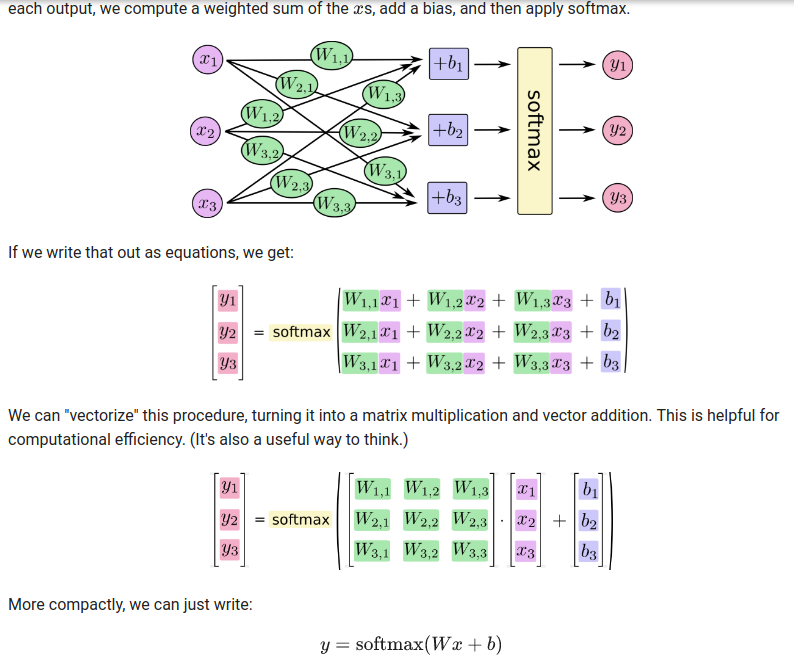

In [3]:
Image('image/02_softmax_formula.png') 
Image('image/02.png') 

In [4]:
# create loss and optimizer
cross_entropy = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits))

train=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
# Trainning
for _ in range(1000):
    x_input,y_input = mnist.train.next_batch(100)
    sess.run(train,{x:x_input,y:y_input})


In [6]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(logits,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
sess.run(accuracy,{x:mnist.test.images,y:mnist.test.labels})

0.91009998

## 完整代码

In [7]:
# import data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# 限制显卡内存
config = tf.ConfigProto(allow_soft_placement=True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

mnist = input_data.read_data_sets("/home/w/tmp/tensorflow/mnist/input_data", one_hot=True)

# define model
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([28 * 28, 10]), tf.float32)
b = tf.Variable(tf.zeros([10]), tf.float32)
logits = tf.matmul(x, W) + b

# define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# run train
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for _ in range(1000):
    xtr, ytr = mnist.train.next_batch(100)
    sess.run(train_step, {x: xtr, y: ytr})

# test trained model
correct = tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
sess.run(accuracy, {x: mnist.test.images, y: mnist.test.labels})


Extracting /home/w/tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


0.91009998

## 练习版

In [1]:
# import data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/home/w/tmp/tensorflow/mnist/input_data", one_hot=True)


Extracting /home/w/tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /home/w/tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


In [21]:
# define model
x=tf.placeholder(tf.float32,shape=[None,28*28])
y=tf.placeholder(tf.float32,shape=[None,10])
W=tf.Variable(tf.zeros([28*28,10]),tf.float32)
b=tf.Variable(tf.zeros([10]),tf.float32)
logits=tf.matmul(x,W)+b

# define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits)
train=tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)

# define test
accuracy= tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(logits,1)),tf.float32))

# run model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
        xtr,ytr=mnist.train.next_batch(1000)
        if _ % 100 == 0:
            sess.run(accuracy,{x:xtr,y:ytr})
        sess.run(train,{x:xtr,y:ytr})
    xte,yte=mnist.test.next_batch(1000)
    print(sess.run(accuracy,{x:xte,y:yte}))

0.104

0.88499999

0.90100002

0.917

0.92000002

0.917

0.917

0.91900003

0.91500002

0.91100001

0.924
